<a href="https://colab.research.google.com/github/ntr262003/IBMSuperstoredataanalysis/blob/main/twitter_sentiment_analysis.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:

from textblob import TextBlob
import pandas as pd
from wordcloud import WordCloud
import tweepy
import re
import matplotlib.pyplot as plt
plt.style.use('fivethirtyeight')


In [ ]:
import tweepy

# API credentials
bearer_token = "AAAAAAAAAAAAAAAAAAAAACXWlgEAAAAANP5PJmE0ka2Fikns%2FbFrVViJcoY%3DvWaIKwDHQijlgRCbU2zEus7BOOEUjVJVd1cW5aNsbIhPpl2Vl4"


# Authenticate with the v2 API
client = tweepy.Client(bearer_token=bearer_token)

# Define your query
query = "from:DealsDhamaka -is:retweet -has:media"

# Search tweets
response = client.search_recent_tweets(query=query, max_results=100, tweet_fields=["created_at", "text"])

# Print results
if response.data:
    for tweet in response.data:
        print(f"{tweet.created_at} - {tweet.text}")
else:
    print("No tweets found.")


2024-11-28 01:59:18+00:00 - @shriyasharma82 Have it in portfolio from a while
2024-11-28 01:59:09+00:00 - @Venkata12006201 Just came from office
2024-11-27 08:14:21+00:00 - Really not sure what demonetization has achieved ?

Fake ₹500 notes surge 317% over five years: Finance Ministry https://t.co/LjaoF8g1hY
2024-11-27 08:13:40+00:00 - @itsrohanvj The Latitude Longitude above is the answer :)
2024-11-27 06:11:00+00:00 - Delaware would have costed even lower 

#Apple https://t.co/8QDXtnPF0x
2024-11-27 04:41:28+00:00 - @sudhiriam Yessu
2024-11-27 04:38:16+00:00 - @YSuryaPrakash7 Non-IT
2024-11-27 03:15:58+00:00 - @techhouseowner Yeah, data farm
2024-11-27 02:54:19+00:00 - Quick Commerce battle in India 

- Blinkit by Zomato
- Instamart by Swiggy
- Zepto
- Minutes by Flipkart
- Flash by Tata Neu
- BBNOW (Bigbasket)
- Tez by Amazon
- Pincode by PhonePe 
- JioMart 

Who else is entering ? First few months will be lucrative to customers due to… https://t.co/pH4BDNMMVa
2024-11-27 02:51:56+00:

In [ ]:
tweet_dates = []
tweet_texts = []

# Extract tweet data
for tweet in response.data:
    tweet_dates.append(tweet.created_at)
    tweet_texts.append(tweet.text)

# Create a DataFrame
df = pd.DataFrame({
    'created_at': tweet_dates,
    'Tweets': tweet_texts
})

# Display the DataFrame
print(df)


                  created_at  \
0  2024-11-28 01:59:18+00:00   
1  2024-11-28 01:59:09+00:00   
2  2024-11-27 08:14:21+00:00   
3  2024-11-27 08:13:40+00:00   
4  2024-11-27 06:11:00+00:00   
..                       ...   
75 2024-11-21 15:03:31+00:00   
76 2024-11-21 15:02:41+00:00   
77 2024-11-21 08:22:30+00:00   
78 2024-11-21 07:28:20+00:00   
79 2024-11-21 05:12:50+00:00   

                                               Tweets  
0   @shriyasharma82 Have it in portfolio from a while  
1              @Venkata12006201 Just came from office  
2   Really not sure what demonetization has achiev...  
3   @itsrohanvj The Latitude Longitude above is th...  
4   Delaware would have costed even lower \n\n#App...  
..                                                ...  
75  Friday - local jail\nMonday - International ja...  
76                        🤮🤮🤮 https://t.co/4DOBWCel3c  
77  @JogulambaV @ncbn @naralokesh @PawanKalyan The...  
78  @StrictlyAsking @ncbn @naralokesh @PawanKalyan...  

In [ ]:
#Create a function to clean the tweets
def cleanTxt(text):
    text=re.sub(r'@[A-Za-z0-9]+','',text) #Removed @mentions
    text=re.sub(r'#','',text) #Removing the '#' symbol
    text=re.sub(r'Rt[\s]+','',text) # Remove the hyper link
    text=re.sub(r'https?:\/\/\S+','',text) #Remove the hyper link
    return text
#Claening the text
df['Tweets']=df['Tweets'].apply(cleanTxt)

#Show the cleaned text
df

,created_at,Tweets
0,2024-11-28 01:59:18+00:00,Have it in portfolio from a while
1,2024-11-28 01:59:09+00:00,Just came from office
2,2024-11-27 08:14:21+00:00,Really not sure what demonetization has achiev...
3,2024-11-27 08:13:40+00:00,The Latitude Longitude above is the answer :)
4,2024-11-27 06:11:00+00:00,Delaware would have costed even lower \n\nApple
...,...,...
75,2024-11-21 15:03:31+00:00,Friday - local jail\nMonday - International ja...
76,2024-11-21 15:02:41+00:00,🤮🤮🤮
77,2024-11-21 08:22:30+00:00,The Links to PDF Files \n\n1) \n\n2) \n\n3)
78,2024-11-21 07:28:20+00:00,"In Aug 2021, please read"


In [ ]:
# to get subjectivity
def getSubjectivity(text):
  return TextBlob(text).sentiment.subjectivity

# to get polarity
def getPolarity(text):
  return TextBlob(text).sentiment.polarity

#create new columns
df['Subjectivity']=df['Tweets'].apply(getSubjectivity)
df['Polarity']=df['Tweets'].apply(getPolarity)

# show the new data frame with the new columns
df


,created_at,Tweets,Subjectivity,Polarity
0,2024-11-28 01:59:18+00:00,Have it in portfolio from a while,0.000000,0.000
1,2024-11-28 01:59:09+00:00,Just came from office,0.000000,0.000
2,2024-11-27 08:14:21+00:00,Really not sure what demonetization has achiev...,0.944444,-0.375
3,2024-11-27 08:13:40+00:00,The Latitude Longitude above is the answer :),0.550000,0.250
4,2024-11-27 06:11:00+00:00,Delaware would have costed even lower \n\nApple,0.000000,0.000
...,...,...,...,...
75,2024-11-21 15:03:31+00:00,Friday - local jail\nMonday - International ja...,0.120000,0.100
76,2024-11-21 15:02:41+00:00,🤮🤮🤮,0.000000,0.000
77,2024-11-21 08:22:30+00:00,The Links to PDF Files \n\n1) \n\n2) \n\n3),0.000000,0.000
78,2024-11-21 07:28:20+00:00,"In Aug 2021, please read",0.000000,0.000


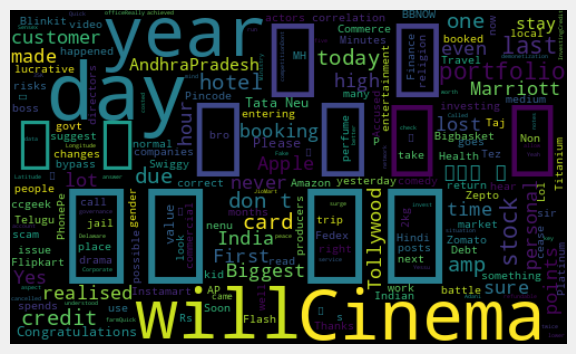

In [ ]:
#plot the word cloud
allWords=''.join([twts for twts in df['Tweets']])
wordCloud= WordCloud(width=500,height=300,random_state =21,max_font_size =119).generate(allWords)

plt.imshow(wordCloud, interpolation="bilinear")
plt.axis('off')
plt.show()


In [ ]:
#create a function to get negative ,positive ,neutral analysis
def getAnalysis(score):
  if score <0:
    return 'Negative'
  elif score==0:
    return 'Neutral'
  else:
    return 'Positive'

df['Analysis']=df['Polarity'].apply(getAnalysis)
#show the data frame

df

,created_at,Tweets,Subjectivity,Polarity,Analysis
0,2024-11-28 01:59:18+00:00,Have it in portfolio from a while,0.000000,0.000,Neutral
1,2024-11-28 01:59:09+00:00,Just came from office,0.000000,0.000,Neutral
2,2024-11-27 08:14:21+00:00,Really not sure what demonetization has achiev...,0.944444,-0.375,Negative
3,2024-11-27 08:13:40+00:00,The Latitude Longitude above is the answer :),0.550000,0.250,Positive
4,2024-11-27 06:11:00+00:00,Delaware would have costed even lower \n\nApple,0.000000,0.000,Neutral
...,...,...,...,...,...
75,2024-11-21 15:03:31+00:00,Friday - local jail\nMonday - International ja...,0.120000,0.100,Positive
76,2024-11-21 15:02:41+00:00,🤮🤮🤮,0.000000,0.000,Neutral
77,2024-11-21 08:22:30+00:00,The Links to PDF Files \n\n1) \n\n2) \n\n3),0.000000,0.000,Neutral
78,2024-11-21 07:28:20+00:00,"In Aug 2021, please read",0.000000,0.000,Neutral


In [ ]:
#print all the positive tweets
j=1
sortedDF=df.sort_values(by=['Polarity'])
for i in range(0,sortedDF.shape[0]):
  if (sortedDF['Analysis'][i]=='Positive'):
    print(str(j)+')'+sortedDF['Tweets'][i])
    print()
    j=j+1

1) The Latitude Longitude above is the answer :)

2)Quick Commerce battle in India 

- Blinkit by Zomato
- Instamart by Swiggy
- Zepto
- Minutes by Flipkart
- Flash by Tata Neu
- BBNOW (Bigbasket)
- Tez by Amazon
- Pincode by PhonePe 
- JioMart 

Who else is entering ? First few months will be lucrative to customers due to… 

3)Quick Commerce battle in India 

- Blinkit by Zomato
- Instamart by Swiggy
- Zepto
- Minutes by Flipkart
- Flash by Tata Neu
- BBNOW (Bigbasket)
- Tez by Amazon
- Pincode by PhonePe 

Who else is entering ? First few months will be lucrative to customers due to competition

4)Dont run after Adani stocks ... 

There are many better stocks in the market to invest. Corporate governance is a key aspect to look at while investing, and will allow for peace of mind

Investing

5)Credit where it’s due

Marriott customer service is ❤️

Due to network issue, I realised the same booking has happened twice on my account (each worth 35K) and that too a non-refundable one (30

In [ ]:
# print the negative tweets
j=1
sortedDF=df.sort_values(by=['Polarity'], ascending=False)
for i in range(0,sortedDF.shape[0]):
  if (sortedDF['Analysis'][i]=='Negative'):
    print(str(j)+')'+sortedDF['Tweets'][i])
    print()
    j=j+1

1)Really not sure what demonetization has achieved ?

Fake ₹500 notes surge 317% over five years: Finance Ministry 

2)Had a 15-hour work day yesterday and realised that I lost 2kg in a day …

Not sure if there is a correlation.

3)Had a 15-hour work day yesterday and realised that I lost 2kg in a day …

Not sure if there is a correlation there.

4)Society is heavily gender-focused. 

Regardless of gender, this is a clear case of child abuse, yet hundreds or even thousands of such videos are being made.

 

5) Sorry to hear Sumanth. 

Stay strong, god give strength to you and your family.



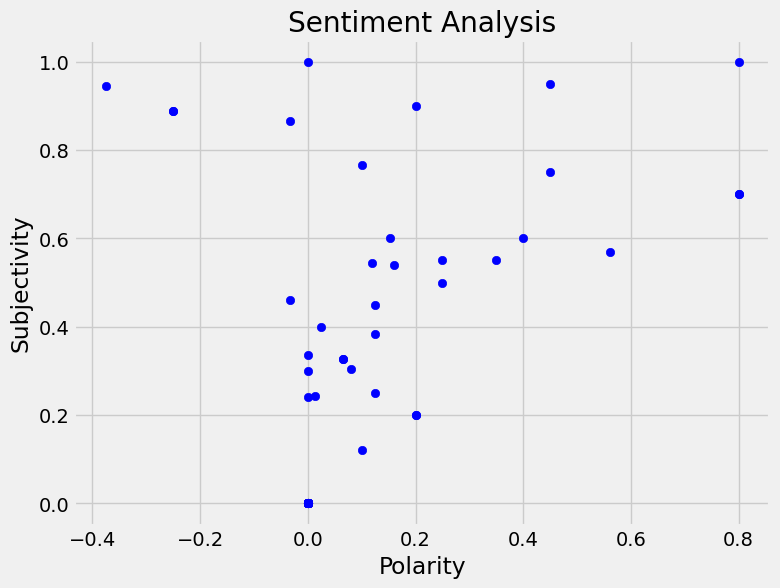

In [ ]:
# plot the polarity and subjectivity
plt.figure(figsize=(8,6))
for i in  range(0,df.shape[0]):
  plt.scatter(df['Polarity'][i],df['Subjectivity'][i],color='Blue')

plt.title('Sentiment Analysis')
plt.xlabel('Polarity')
plt.ylabel('Subjectivity')
plt.show()

In [ ]:
#get the percentage of positive tweets
ptweets=df[df.Analysis=='Positive']
ptweets=ptweets['Tweets']

round((ptweets.shape[0]/df.shape[0])*100,1)

32.5

In [ ]:
#get the percentage of negative tweets
ntweets=df[df.Analysis== 'Negative']
ntweets= ntweets['Tweets']

round( (ntweets.shape[0]/df.shape[0]*100), 1 )

6.2

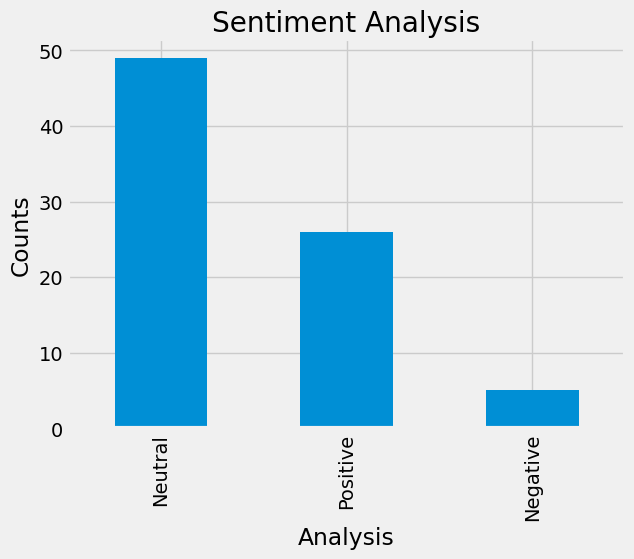

In [ ]:
#show the value counts

df['Analysis'].value_counts()

#plot and visualize the counts
plt.title('Sentiment Analysis')
plt.xlabel('Sentiment')
plt.ylabel('Counts')
df['Analysis'].value_counts().plot(kind='bar')
plt.show()